In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import Normalize

# Refueling - No penalties

In [2]:
# Refueling - No penalties

In [33]:
def payload_i (delv_elec,delv_chem, isp_elec, isp_chem,v_ch,beta_i):
    g=9.81
    Hi= -1 + np.exp(-beta_i *delv_elec/(isp_elec*g))+ np.exp(-beta_i *delv_chem/(isp_chem*g)) - (delv_elec/v_ch)**2 *(1-np.exp(-delv_elec/(isp_elec*g)))
    return Hi

In [38]:
delv_elec=1000
delv_chem=1000
v_ch=(1/0.5)*delv_elec
c_chem=np.arange(100.,501,20)
c_elec=np.arange(500.,5000,50)
beta_i=1


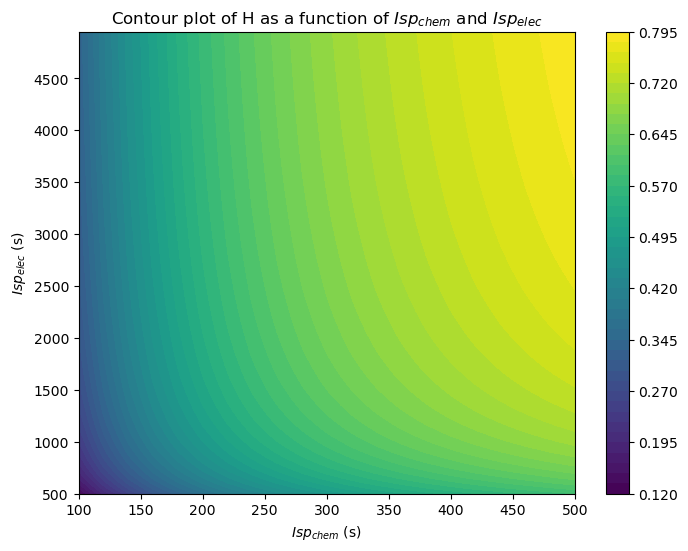

In [45]:
# Create a meshgrid for c_chem and c_elec
C_chem, C_elec = np.meshgrid(c_chem, c_elec)

# Calculate H for each combination of c_chem and c_elec
H_values = np.zeros_like(C_chem)
for i in range(C_chem.shape[0]):
    for j in range(C_chem.shape[1]):
        H_values[i, j] = payload_i(delv_elec, delv_chem, C_elec[i, j], C_chem[i, j], v_ch, beta_i)

# Plot the contour
plt.figure(figsize=(8, 6))
contour = plt.contourf(C_chem, C_elec, H_values, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.xlabel(r'$Isp_{chem}$ (s)')
plt.ylabel(r'$Isp_{elec}$ (s)')
plt.title(r'Contour plot of H as a function of $Isp_{chem}$ and $Isp_{elec}$')
plt.savefig("figures/hybrid/H_hyb.png",bbox_inches='tight')
plt.show()